<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-YvTur/blob/main/Semana7_Modulo4_a00813752.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analysis with Python (IBM)


#Modulo 4

**Model Development**

Se puede pensar en un modelo o estimador como una ecuación matemática utilizada para predecir un valor dado uno o más valores.
Relacionar una o más variables o características independientes con variables dependientes.

**Linear and Multiple Linear Regression**

La regresión lineal se referirá a una variable independiente para hacer una predicción.
La regresión lineal múltiple se referirá a múltiples variables independientes para hacer una predicción.


**Simple Linear Regression**

La variable predictora (independiente) x

La variable objetivo (dependiente) y.

**Evaluación del modelo usando Visualización**

*Regression plot:* 

Los gráficos de regresión son una buena estimación de:

*   La relación entre dos variables.
*   La fuerza de la correlación.
*   La dirección de la relación (positiva o negativa).





In [1]:
#We first call the pandas library
import pandas as pd
#we call numpy
import numpy as np
#Note for future Yves, when calling a csv on colab, 
#call it from github and call the raw material
url="https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-YvTur/main/Data%20Analysis/auto.csv"
#We call the url of the CSV
df =pd.read_csv(url)  
df


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [2]:
import matplotlib.pyplot as plt

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


###Linear Regression and Multiple Linear Regression
Regresión lineal Un ejemplo de un modelo de datos que usaremos es:

Regresión lineal simple La regresión lineal simple es un método que nos ayuda a comprender la relación entre dos variables:

El predictor/variable independiente (X) La respuesta/variable dependiente (que queremos predecir)(Y) El resultado de la regresión lineal es una función lineal que predice la variable de respuesta (dependiente) en función de la variable predictora (independiente).

Linear Function


*   a se refiere a la intersección de la línea de regresión, en otras palabras: el valor de Y cuando X es 0
*  b se refiere a la pendiente de la línea de regresión, en otras palabras: el valor con el que cambia Y cuando X aumenta en 1 unidad

In [10]:

#Let's load the modules for linear regression 
from sklearn.linear_model import LinearRegression
#Create the linear regression object: 
lm = LinearRegression()
#How could "highway-mpg" help us predict car price?¶ #For this example, we want to look at how highway-mpg can help us predict car price.
#Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable. 

X = df[['highway-mpg']]
Y = df['price']

lm.fit(X,Y)

LinearRegression()

In [12]:
Yhat=lm.predict(X) 
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [13]:
#What is the value of the intercept (a)?
lm.intercept_

38423.3058581574

In [14]:
#What is the value of the slope (b)?
lm.coef_

array([-821.73337832])

In [16]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [17]:
#Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

lm1.fit(df[['engine-size']], df[['price']]) 
lm1

LinearRegression()

In [18]:
#Find the slope and intercept of the model.

#SLOPE 
lm1.coef_

array([[166.86001569]])

In [19]:

# Intercept 
lm1.intercept_

array([-7963.33890628])

In [21]:

# using X and Y 
Yhat=-7963.34 + 166.86*X 
Price=-7963.34 + 166.86*df['engine-size']

In [37]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

###Model Evaluation Using Visualization

In [24]:

# import the visualization package: seaborn 
import seaborn as sns 

Regression Plot

Cuando se trata de regresión lineal simple, una excelente manera de visualizar el ajuste de nuestro modelo es mediante el uso de gráficos de regresión.

Este gráfico mostrará una combinación de puntos de datos dispersos (un diagrama de dispersión), así como la línea de regresión lineal ajustada que atraviesa los datos. Esto nos dará una estimación razonable de la relación entre las dos variables, la fuerza de la correlación, así como la dirección (correlación positiva o negativa).

(0.0, 48186.90708912636)

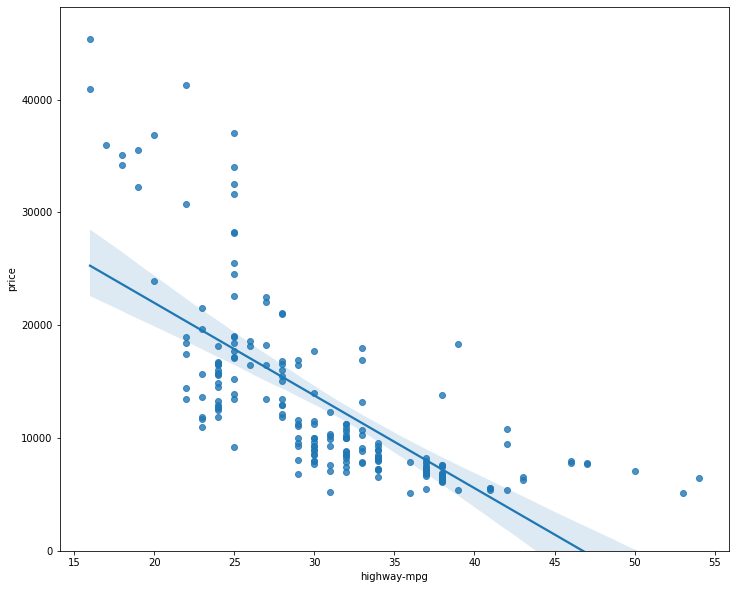

In [25]:

#Let's visualize **highway-mpg** as potential predictor variable of price: 
width = 12 
height = 10 
plt.figure(figsize=(width, height)) 
sns.regplot(x="highway-mpg", y="price", data=df) 
plt.ylim(0,)

In [28]:
#Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()"
df[["peak-rpm","highway-mpg","price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


**Residual Plot**

Una buena manera de visualizar la varianza de los datos es usar un gráfico de residuos.

**¿Qué es un residual?**

La diferencia entre el valor observado (y) y el valor pronosticado (Yhat) se denomina residuo (e). Cuando observamos un gráfico de regresión, el residuo es la distancia desde el punto de datos hasta la línea de regresión ajustada.

**¿qué es una parcela residual?**

Una gráfica de residuos es un gráfico que muestra los residuos en el eje vertical y y la variable independiente en el eje horizontal x.

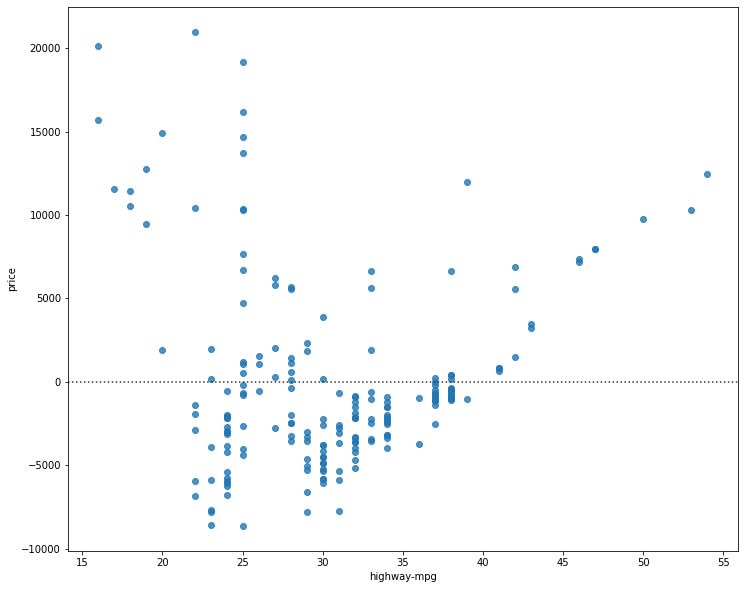

In [29]:
width = 12 
height = 10 
plt.figure(figsize=(width, height)) 
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

####Multiple Linear Regression
¿Cómo visualizamos un modelo de regresión lineal múltiple? Esto se vuelve un poco más complicado porque no puede visualizarlo con regresión o gráfico residual.

Una forma de ver el ajuste del modelo es mirar el gráfico de distribución. Podemos observar la distribución de los valores ajustados que resultan del modelo y compararla con la distribución de los valores reales.

In [36]:
#First, let's make a prediction: 
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
# Fit the linear model using the four above-mentioned variables. 


Y_hat = lm.predict(Z)

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


NameError: ignored

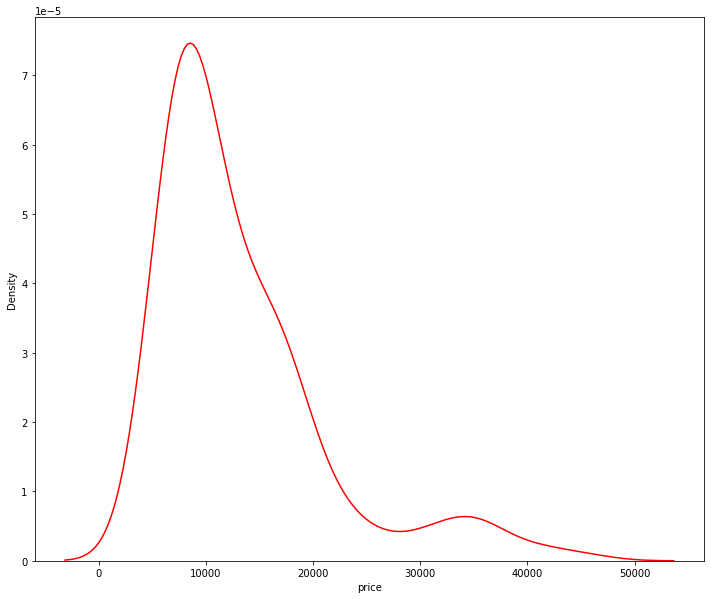

In [34]:
plt.figure(figsize=(width, height)) 
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value") 
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1) 
plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('Price (in dollars)') 
plt.ylabel('Proportion of Cars') 
plt.show() 
plt.close()